In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex1data2.csv', header=None)
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
X = data.iloc[:,0:2].values
Y = data.iloc[:,-1].values
Y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500])

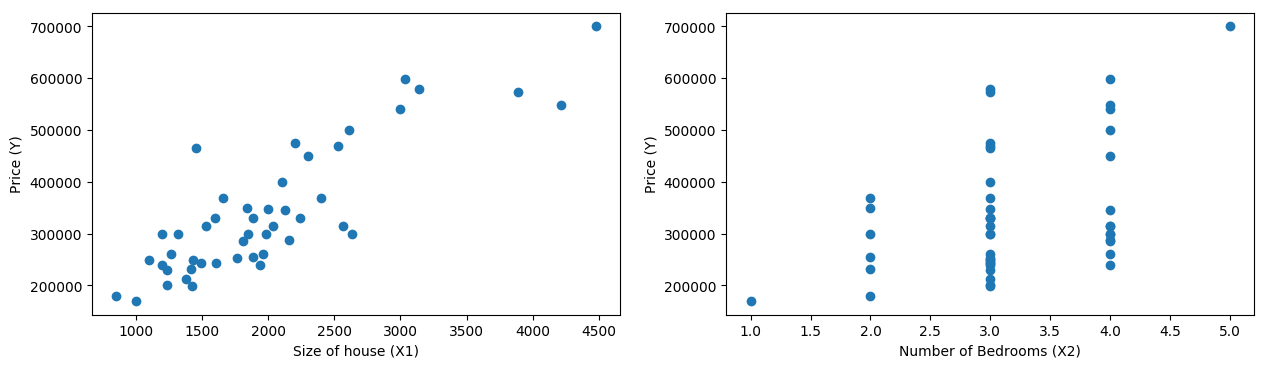

In [4]:
# Plotting example dataset
plt.figure(figsize = (15,4),dpi=100)
plt.subplot(121)
plt.scatter(X[:,0],Y)
plt.xlabel("Size of house (X1)")
plt.ylabel("Price (Y)")
plt.subplot(122)
plt.scatter(X[:,-1],Y)
plt.xlabel("Number of Bedrooms (X2)")
plt.ylabel("Price (Y)")
plt.show()

In [5]:
def normalEquation(X, y):
    m = int(np.size(data[:, 1]))

    # This is the feature / parameter (2x2) vector that will
    # contain my minimized values
    theta = []

    # I create a bias_vector to add to my newly created X vector
    bias_vector = np.ones((m, 1))

    # I need to reshape my original X(m,) vector so that I can
    # manipulate it with my bias_vector; they need to share the same
    # dimensions.
    X = np.reshape(X, (m, 1))

    # I combine these two vectors together to get a (m, 2) matrix
    X = np.append(bias_vector, X, axis=1)

    # Normal Equation:
    # theta = inv(X^T * X) * X^T * y

    # For convenience I create a new, tranposed X matrix
    X_transpose = np.transpose(X)

    # Calculating theta
    theta = np.linalg.inv(X_transpose.dot(X))
    theta = theta.dot(X_transpose)
    theta = theta.dot(y)

    return theta

In [6]:
X = data.iloc[:,0].values
y = data.iloc[:,2].values
print(X.shape)
print(y.shape)
data = data.iloc[:].values
print(data.shape)

(47,)
(47,)
(47, 3)


In [7]:
thetas = normalEquation(y, X)
thetas

array([1.50895235e+02, 5.43395072e-03])

In [8]:
#predict house of size 2200sq‐ft and a house of size 3100sq‐ft.
print(thetas[0]*2200 + thetas[1])

#predict profit for 70,000
print(thetas[0]*3100 + thetas[1])

331969.5217739185
467775.2330039053


In [9]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

# Make predictions on house of size 2200sq‐ft and a house of size 3100sq‐ft.
#y_pred = regr.predict(X_test.reshape(-1, 1))
y_pred = regr.predict(np.array([[2200],[3100]]))
y_pred

(35,)
(12,)
(35,)
(12,)


array([[360647.08171433],
       [471896.80324151]])

In [10]:
# The parameters
print('thetas: \n', regr.coef_, regr.intercept_)

thetas: 
 [[123.6108017]] [88703.31798121]


In [11]:
# normalization
X = X/X.max()

In [12]:
X

array([0.46985261, 0.35730237, 0.53595355, 0.31621259, 0.66994194,
       0.44327825, 0.34256364, 0.31866905, 0.30817329, 0.33363109,
       0.43322912, 0.44662796, 0.42206342, 1.        , 0.28316213,
       0.51362215, 0.29477445, 0.27601608, 0.58262617, 0.67686467,
       0.3945958 , 0.42161679, 0.35819562, 0.43814203, 0.86869138,
       0.24564538, 0.32559178, 0.56409111, 0.49129075, 0.58887896,
       0.41067441, 0.22331398, 0.45556052, 0.70053595, 0.40442162,
       0.32090219, 0.27668602, 0.4761054 , 0.94126842, 0.48280482,
       0.37159446, 0.49977669, 0.57324699, 0.26797678, 0.19026351,
       0.41357749, 0.26864672])

In [13]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

# Make predictions on house of size 2200sq‐ft and a house of size 3100sq‐ft.
#y_pred = regr.predict(X_test.reshape(-1, 1))
y_pred = regr.predict(np.array([[2200/4478],[3100/4478]])) #4478 = max value in X
y_pred

(35,)
(12,)
(35,)
(12,)


array([[360647.08171433],
       [471896.80324151]])

In [14]:
# The parameters
print('thetas: \n', regr.coef_, regr.intercept_)

thetas: 
 [[553529.16999859]] [88703.31798121]


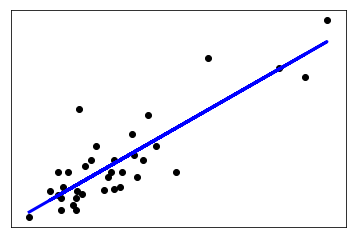

In [15]:
# Plot [train]
y_pred = regr.predict(X_train.reshape(-1, 1))

plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

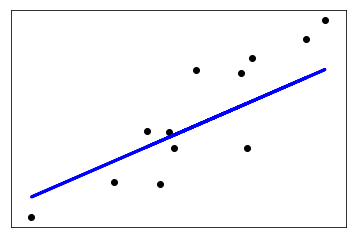

In [16]:
# Plot [test]
y_pred = regr.predict(X_test.reshape(-1, 1))

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [17]:
data = pd.read_csv('ex1data2.csv', header=None)
X = data.iloc[:,0].values
y = data.iloc[:,2].values

In [18]:
X = np.array(data[0]).reshape(47, 1)
y = np.array(data[1]).reshape(47, 1)
print(X.shape)
print(y.shape)

(47, 1)
(47, 1)


In [19]:
X_b = np.c_[np.ones((47,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[2.09743385e+00]
 [5.36206918e-04]]


In [20]:
X_new = np.array([[2200],[3100]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.27708907],
       [3.7596753 ]])

In [21]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [22]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [25]:
lr =0.00000001
n_iter = 100

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          -1.958,
Theta1:          -0.003
Final cost/MSE:  120199.600


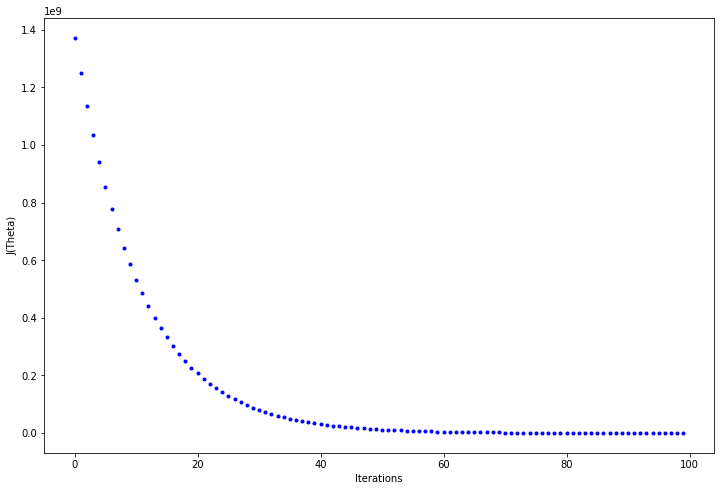

In [26]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

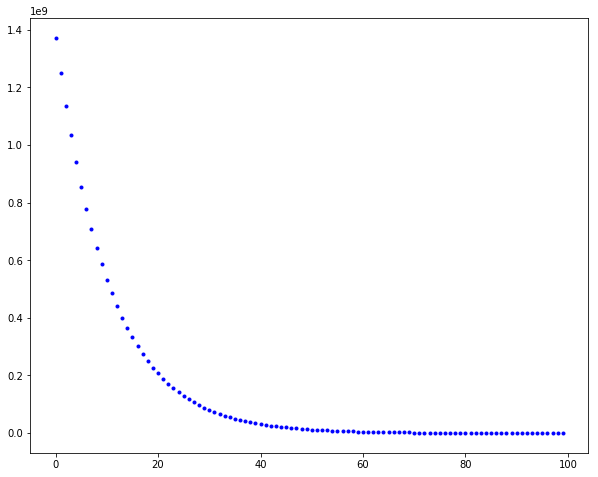

In [27]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(100),cost_history[:100],'b.')

In [28]:
def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

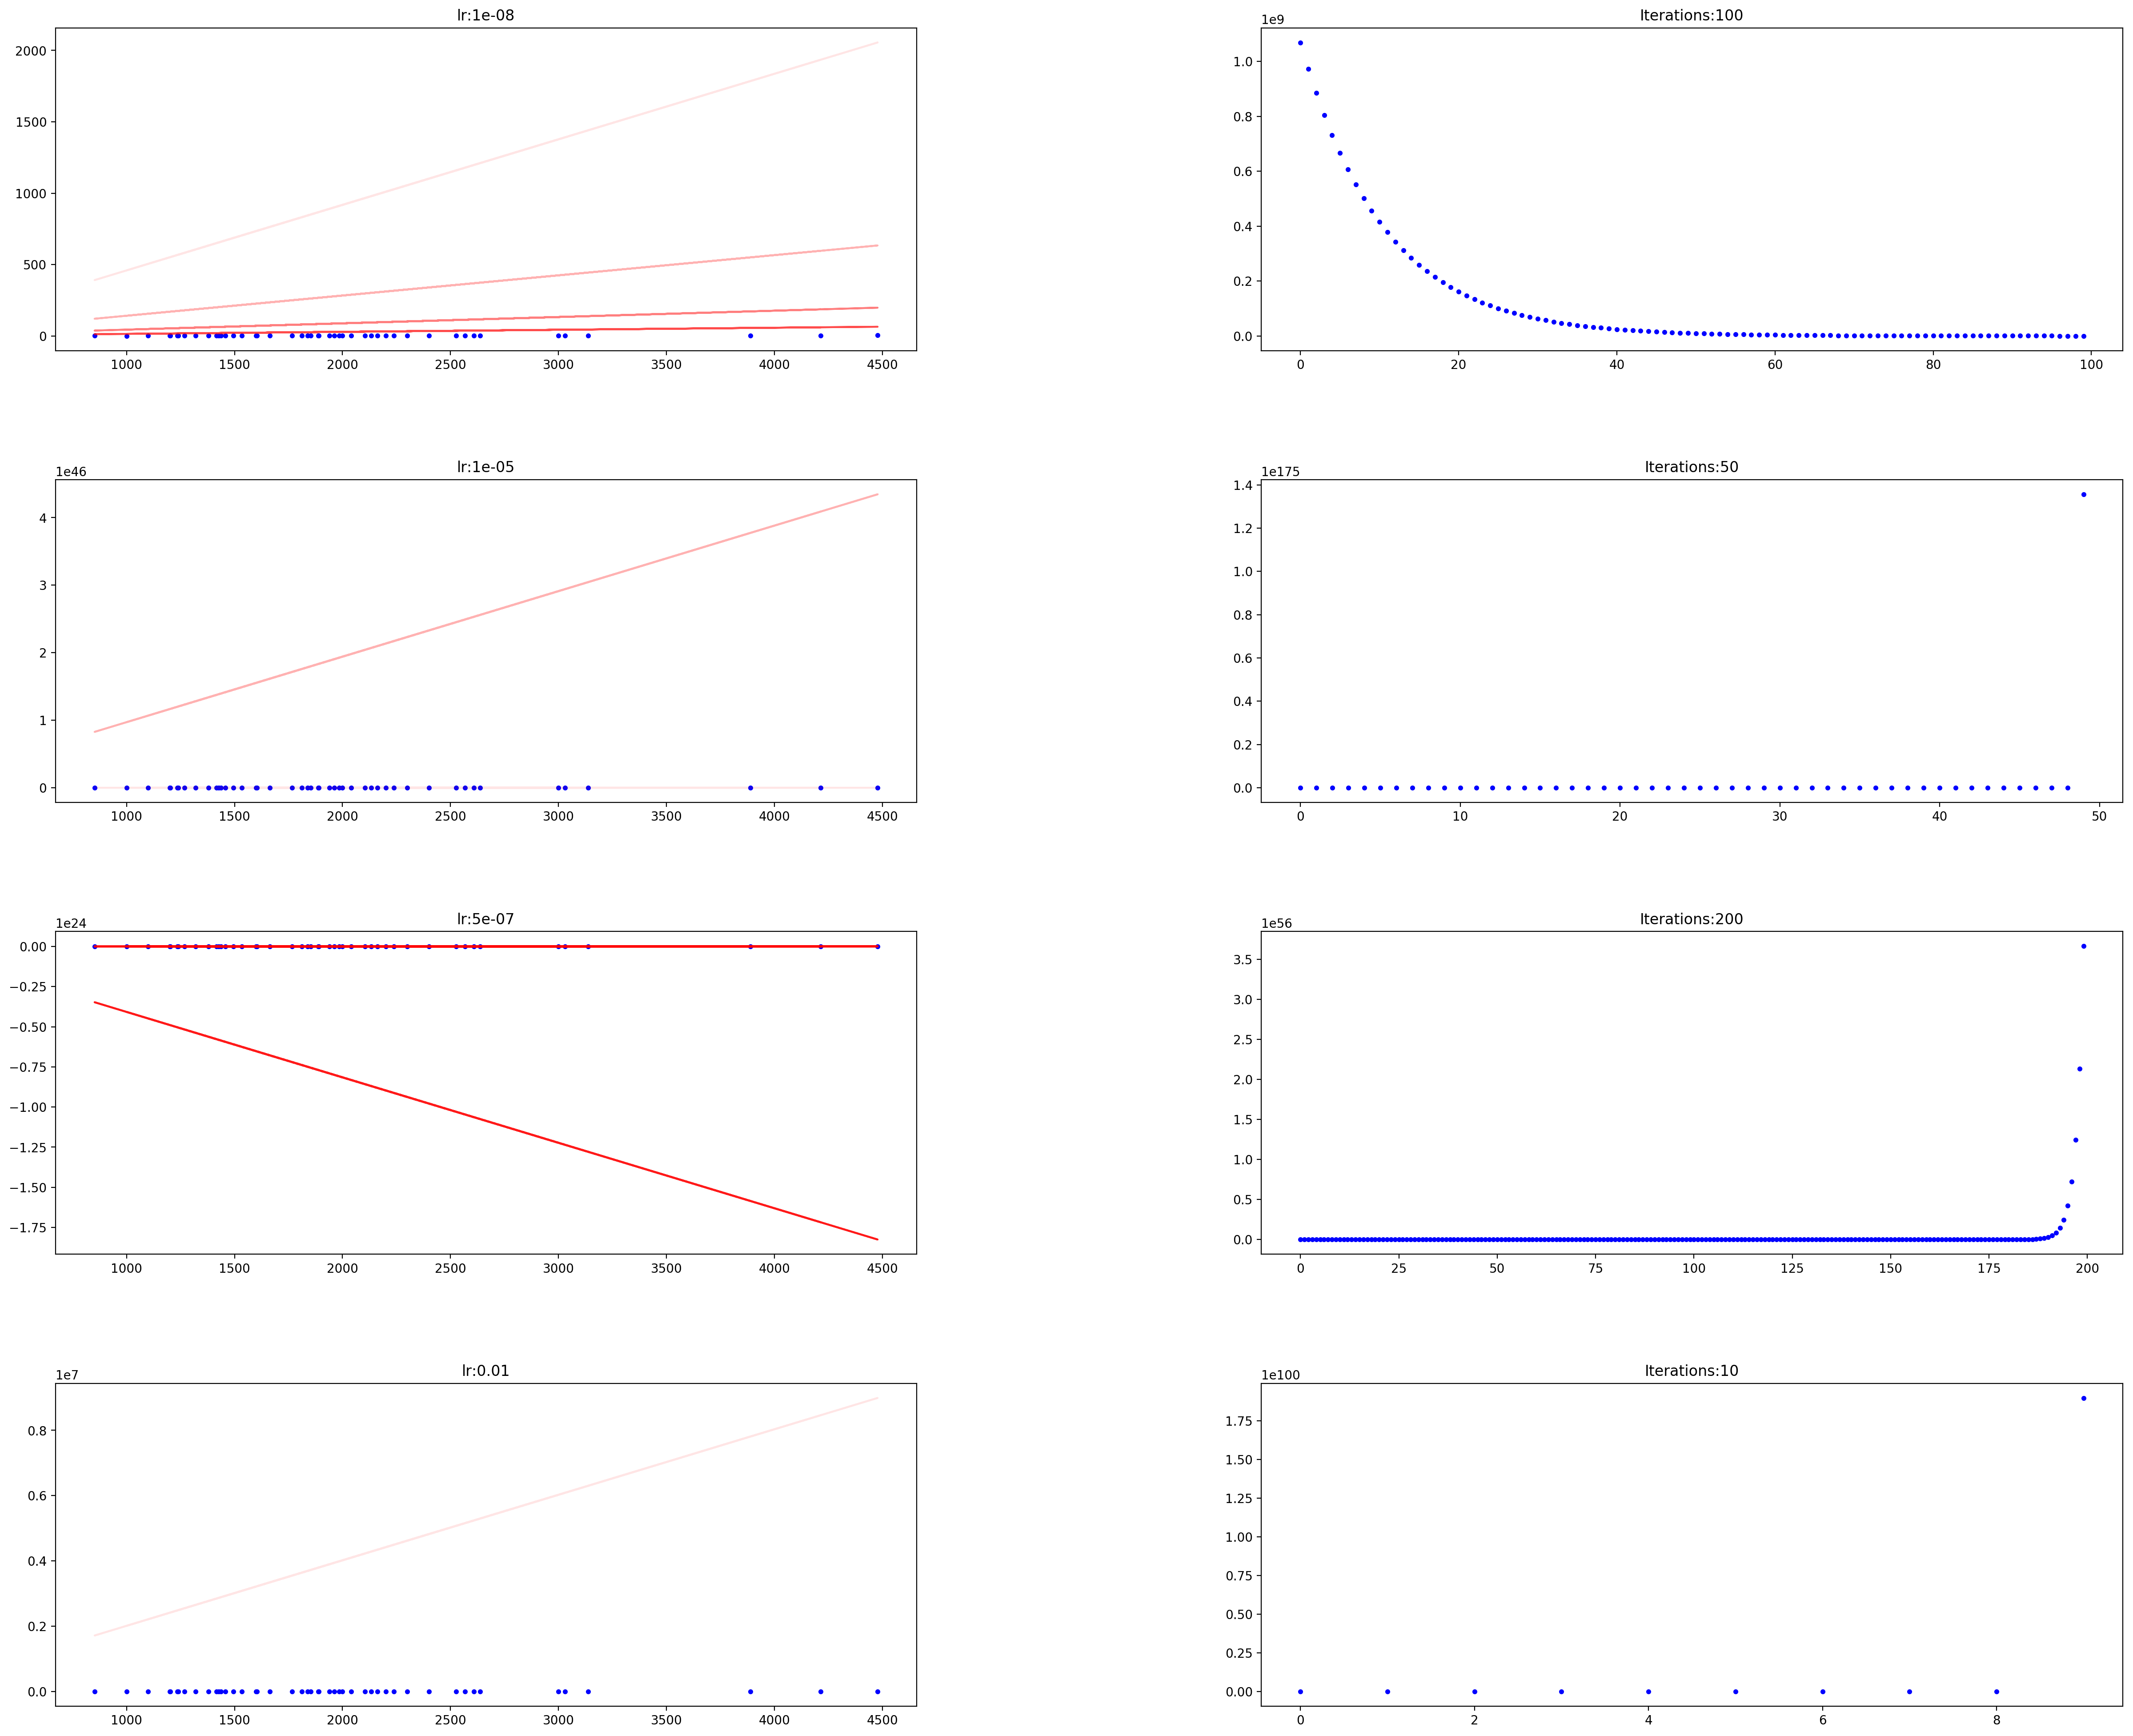

In [30]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(100,0.00000001),(50,0.00001),(200,0.0000005),(10,0.01)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)

In [31]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [32]:
lr =0.00000001
n_iter = 100

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          2.065,
Theta1:          -0.006
Final cost/MSE:  6144.865


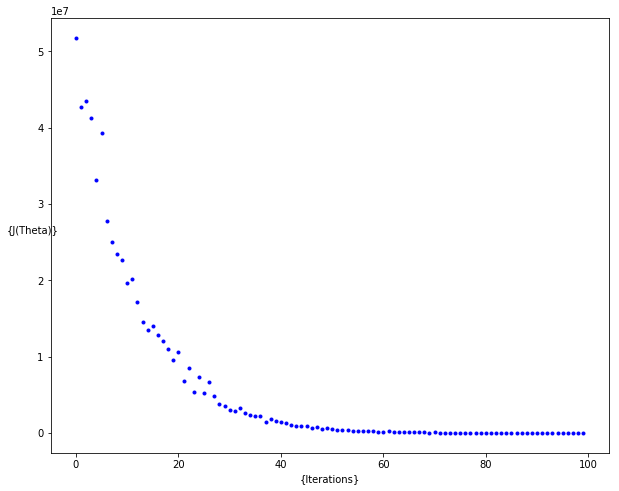

In [33]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

In [34]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [35]:
lr =0.00000001
n_iter = 100

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          -0.322,
Theta1:          -0.012
Final cost/MSE:  360199.599


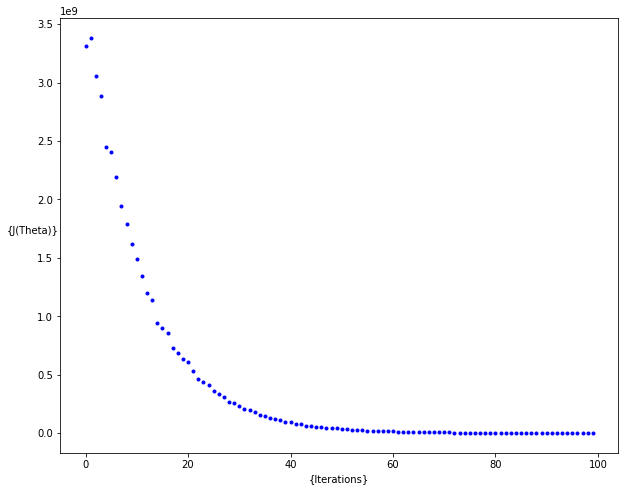

In [36]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')